# 🧪 A/B Testing for Portal Redesign – BPO Employee Portal

## 🔰 Introduction

You are the data scientist at a BPO company where employees use an internal web portal to manage calls and tickets. The company is preparing to roll out a **new layout** and wants to assess its potential impact before a full deployment.

This notebook walks through an end-to-end A/B testing simulation to evaluate the new design.

---

## 🎯 Objectives

### 📌 Part 1: Sample Size & Experiment Setup
- Estimate the **minimum number of users** needed to detect a meaningful effect.
- Randomly assign users from `user_id.csv` to **Old** (control) and **New** (treatment) groups.
- Export the assignment list for the engineering/data team.

### 📌 Part 2: Analyzing the Experiment Results
Using data from `lab15_data.csv`:
- Perform **exploratory data analysis**.
- Visualize group behavior using KDE, QQ, and histogram plots.
- Conduct **hypothesis testing** to compare:
  - Activation rates
  - Purchase behavior
- Use tests such as:
  - Shapiro-Wilk
  - Chi-Square
  - t-test / Mann-Whitney U
  - Proportions Z-test
- Calculate **effect sizes** (Cohen’s d) and **confidence intervals**.
- Evaluate **power of the test** and statistical significance.

---

## ❓ Key Questions
- How many users do we need to detect a change reliably?
- Is there a significant difference in behavior between old vs. new versions?
- Can we confidently recommend rolling out the new layout?

---

## 📁 Files Used
- `user_id.csv`: 1,000 employee user IDs
- `lab15_data.csv`: Simulated behavioral metrics post-experiment

---

## 🧰 Libraries Used
- `pandas`, `numpy`
- `matplotlib`, `seaborn`
- `scipy.stats`, `statsmodels`

---

## 🧠 Conclusion
This simulation reflects a real-world approach to **A/B testing** and **experimental design**, crucial for any data-driven decision-making process in product development.


- You're the data scientist for a BPO company where employees use a portal for taking calls and ticketing. You are given the file 'user_id' consisting of the employee ids.
<br>
- The company is planning to change the layout and has a proposed New Version
<br>
- Currently, there are 1000 employees.

##Objective  1: How many employees do you need to test the new layout? The effect size for the same concept in the pilot study was 0.71. What is the outcome?

In [ ]:
import statsmodels.stats.power as smp

effect_size = 0.71
alpha = 0.05
power = 0.8

analysis = smp.TTestIndPower()
required_sample_size = analysis.solve_power(effect_size, power=power, alpha=alpha)

print(f"Required sample size: {round(required_sample_size)}")

Required sample size: 32


#Objective 2: Which employees would you need specifically so that the data team can pull their data for you? We need to have a file consisting of  user ids where it is specified which users  has the old version and which users would be deployed the new versions to.

In [ ]:
#randomization
#print the list, export the list into a csv.
import random
import pandas as pd
df=pd.read_csv("user_id.csv")


In [ ]:

n_users = len(df)

random_assignment = np.random.permutation(n_users)

random_version_A = random_assignment[:n_users // 2]
random_version_B = random_assignment[n_users // 2:]

df['assigned_version'] = ''

df.loc[random_version_A, 'assigned_version'] = 'old'
df.loc[random_version_B, 'assigned_version'] = 'new'

df.assigned_version.to_csv('random_assignment.csv', index=False)



Perform all of the experiment steps for lab15_data.csv.



*Note: this is a different dataset*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("lab15_data.csv")
df

,user_id,version,new_user_activation,purchases
0,0,A,False,1
1,1,A,True,1
2,2,A,True,3
3,3,A,False,0
4,4,A,True,0
...,...,...,...,...
995,995,A,False,0
996,996,B,True,0
997,997,A,False,3
998,998,B,False,1


In [ ]:
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 user_id                0
version                0
new_user_activation    0
purchases              0
dtype: int64


In [ ]:
grouped = df.groupby('version').agg(
    new_user_activation_rate=('new_user_activation', 'mean'),
    average_purchases=('purchases', 'mean')
)

print(grouped)



         new_user_activation_rate  average_purchases
version                                             
A                        0.559671           1.043210
B                        0.587549           0.974708


In [ ]:
# Calculate purchase rates
purchase_rate_version_A = version_A.mean()
purchase_rate_version_B = version_B.mean()
print(f"Purchase rate - version_A: {purchase_rate_version_A:.4f}")
print(f"Purchase rate - version_B: {purchase_rate_version_B:.4f}")

# Relative difference
rel_diff = (purchase_rate_version_B - purchase_rate_version_A) / purchase_rate_version_A
print(f"Relative difference: {rel_diff:.2%}")

Purchase rate - version_A: 1.0432
Purchase rate - version_B: 0.9747
Relative difference: -6.57%


In [ ]:


group_A = df[df['version'] == 'A']['purchases']
group_B = df[df['version'] == 'B']['purchases']


pooled_std = np.sqrt(((group_A.std() ** 2) + (group_B.std() ** 2)) / 2)

cohens_d = (group_B.mean() - group_A.mean()) / pooled_std
print(f"Cohen's d: {cohens_d:.3f}")


Cohen's d: -0.066


version_A group normality p-value: 0.0000
version_B group normality p-value: 0.0000


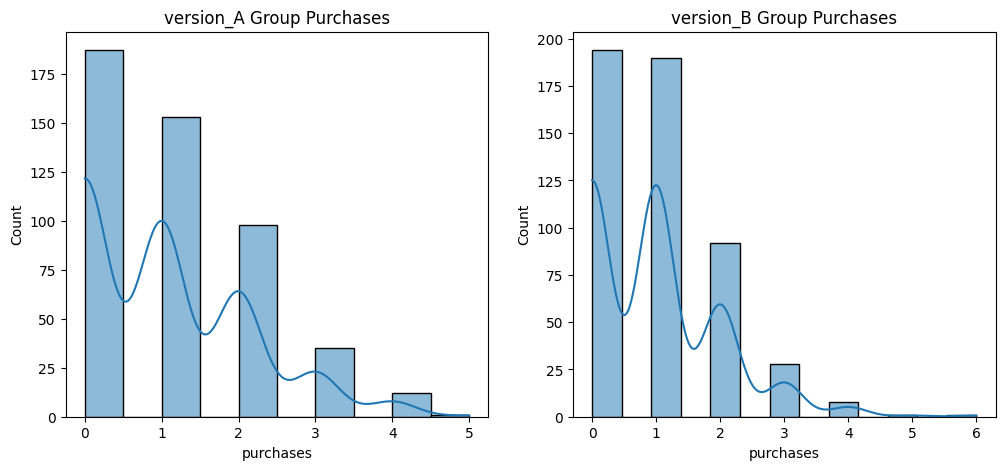

In [ ]:
from scipy import stats

# Shapiro-Wilk test for normality
_, p_version_A = stats.shapiro(version_A)
_, p_version_B = stats.shapiro(version_B)
print(f"version_A group normality p-value: {p_version_A:.4f}")
print(f"version_B group normality p-value: {p_version_B:.4f}")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(version_A, kde=True)
plt.title('version_A Group Purchases')
plt.subplot(1, 2, 2)
sns.histplot(version_B, kde=True)
plt.title('version_B Group Purchases')
plt.show()

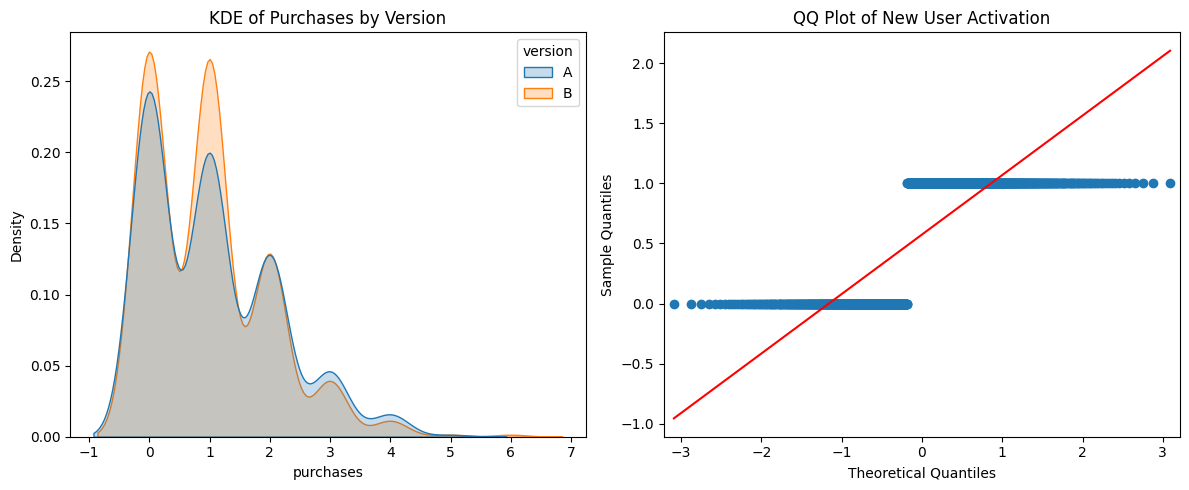

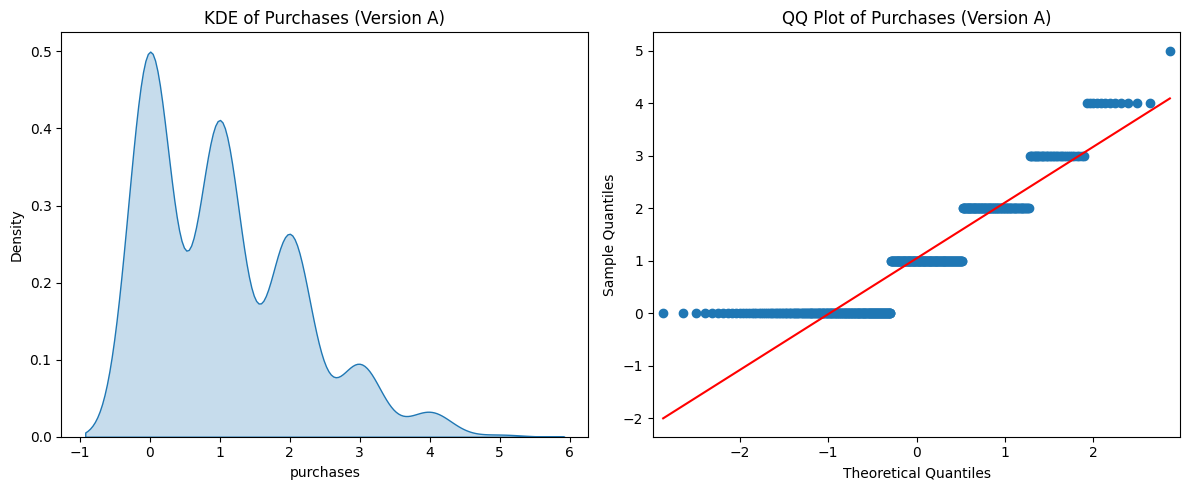

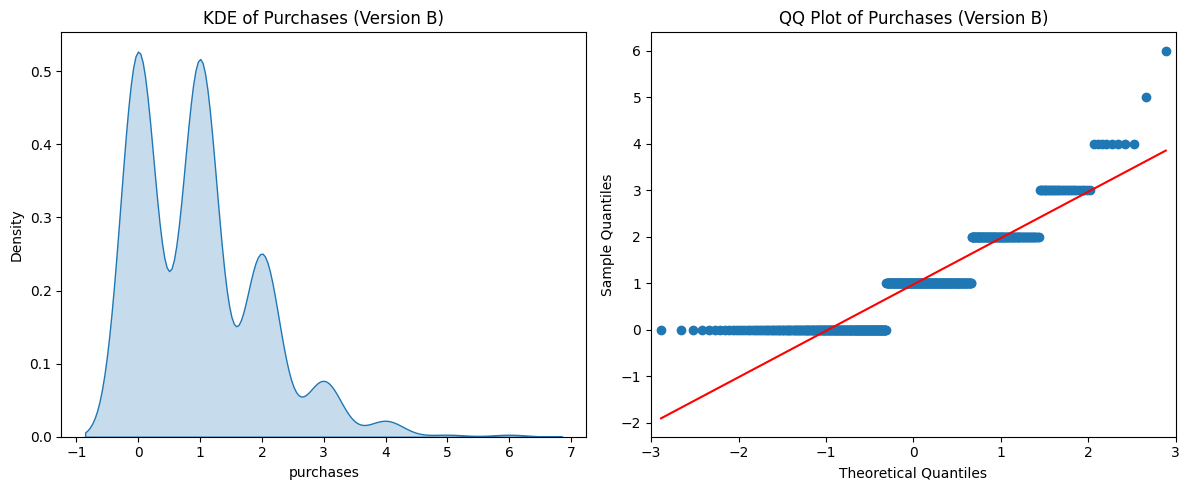

In [ ]:
# plot kde and qq plots

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Purchases distribution (KDE)
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='purchases', hue='version', fill=True)
plt.title('KDE of Purchases by Version')

# New user activation distribution (QQ plot)
plt.subplot(1, 2, 2)
sm.qqplot(df['new_user_activation'].astype(float), line='s', ax=plt.gca())
plt.title('QQ Plot of New User Activation')

plt.tight_layout()
plt.show()

# KDE and QQ plots for purchases by version
plt.figure(figsize=(12, 5))

# KDE for version A purchases
plt.subplot(1, 2, 1)
sns.kdeplot(version_A, fill=True)
plt.title('KDE of Purchases (Version A)')

# QQ plot for version A purchases
plt.subplot(1, 2, 2)
sm.qqplot(version_A, line='s', ax=plt.gca())
plt.title('QQ Plot of Purchases (Version A)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

# KDE for version B purchases
plt.subplot(1, 2, 1)
sns.kdeplot(version_B, fill=True)
plt.title('KDE of Purchases (Version B)')

# QQ plot for version B purchases
plt.subplot(1, 2, 2)
sm.qqplot(version_B, line='s', ax=plt.gca())
plt.title('QQ Plot of Purchases (Version B)')

plt.tight_layout()
plt.show()


H0: No difference in activation rate between old and new version <BR>
H1: There is a difference<BR>

---
H0: Mean purchases are equal between old and new<BR>
H1: Means differ


In [ ]:
# chi2 test

contingency_table = pd.crosstab(df['version'], df['new_user_activation'])


from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

Chi-squared statistic: 0.6840405000174762
p-value: 0.4081988550570598


In [ ]:
# mannwhitney U test

from scipy.stats import ttest_ind, mannwhitneyu


activations_A = df.loc[df['version'] == 'A', 'new_user_activation']
activations_B = df.loc[df['version'] == 'B', 'new_user_activation']

t_stat_activations, p_value_activations = ttest_ind(activations_A, activations_B)

u_stat_purchases, p_value_purchases = mannwhitneyu(group_A, group_B)


print("New user activations:")
print(f"  t-statistic: {t_stat_activations:.2f}, p-value: {p_value_activations:.5f}")

print("\nPurchases:")
print(f"  U-statistic: {u_stat_purchases:.2f}, p-value: {p_value_purchases:.5f}")


New user activations:
  t-statistic: inf, p-value: nan

Purchases:
  U-statistic: 128254.50, p-value: 0.43821


In [ ]:
# Proportion test

import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest


successes = df.groupby('version')['new_user_activation'].sum()
n_obs = df.groupby('version')['new_user_activation'].count()

z_stat, pval = proportions_ztest(count=successes, nobs=n_obs)
print("Proportion Z-test p-value:", pval)


Proportion Z-test p-value: 0.37290647659247933


In [ ]:
# powre test

from statsmodels.stats.power import TTestIndPower
def cohens_d(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = ((n1-1)*var1 + (n2-1)*var2) / (n1 + n2 - 2)
    d = diff / np.sqrt(pooled_var)
    return d

version_A = df[df['version'] == 'A']['purchases']
version_B = df[df['version'] == 'B']['purchases']
effect_size = cohens_d(version_A, version_B)

analysis = TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1=len(version_A),
                            alpha=0.05, ratio=len(version_B)/len(version_A))
print(f"Power of the test: {power:.2f}")

Power of the test: 0.18


In [ ]:
# Levene's test for equal variances
_, p_var = stats.levene(version_A, version_B)
print(f"Variance equality p-value: {p_var:.4f}")

Variance equality p-value: 0.0545


In [ ]:

def get_ci(group1, group2, alpha=0.05):
    mean1, mean2 = group1.mean(), group2.mean()
    std1, std2 = group1.std(), group2.std()
    n1, n2 = len(group1), len(group2)

    std_err = np.sqrt((std1**2/n1) + (std2**2/n2))
    margin = stats.norm.ppf(1 - alpha/2) * std_err
    diff = mean2 - mean1
    ci_low = diff - margin
    ci_high = diff + margin
    return (ci_low, ci_high)

ci_low, ci_high = get_ci(version_A, version_B)
print(f"95% CI for difference in purchase rates: [{ci_low:.4f}, {ci_high:.4f}]")

95% CI for difference in purchase rates: [-0.1965, 0.0595]


If the CI includes 0, then the difference is not statistically significant.<BR>

If the CI is entirely above or below 0, the difference is significant at the α level.

